In [1]:
#installing dependencies...
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
print('dependencies installed...')

dependencies installed...


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)
data = pd.read_csv(f'{path}/Housing.csv')

print('dataset uploaded...')

Path to dataset files: /kaggle/input/housing-prices-dataset
dataset uploaded...


**Data Exploration to understand Data**

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
data.shape

(545, 13)

In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


**Checking relationship between variables -- Data Visualization**

In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


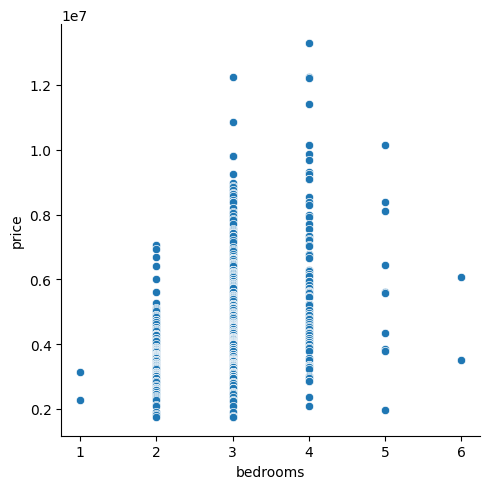

In [10]:
sns. relplot(x='bedrooms',y='price',data=data)

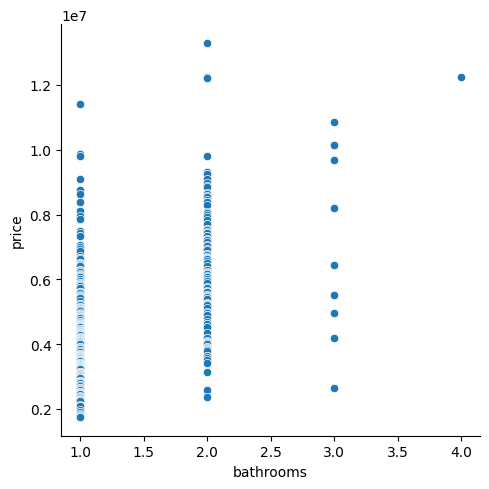

In [11]:
sns. relplot(x='bathrooms',y='price',data=data)

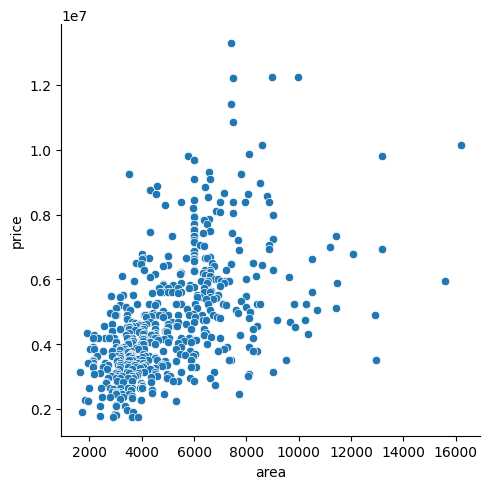

In [12]:
sns. relplot(x='area',y='price',data=data)

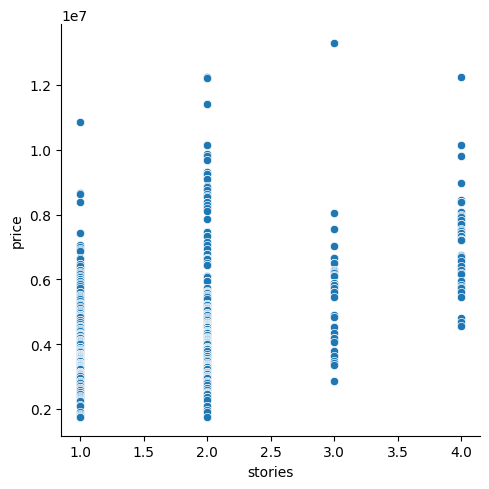

In [13]:
sns. relplot(x='stories',y='price',data=data)

<Axes: ylabel='price'>

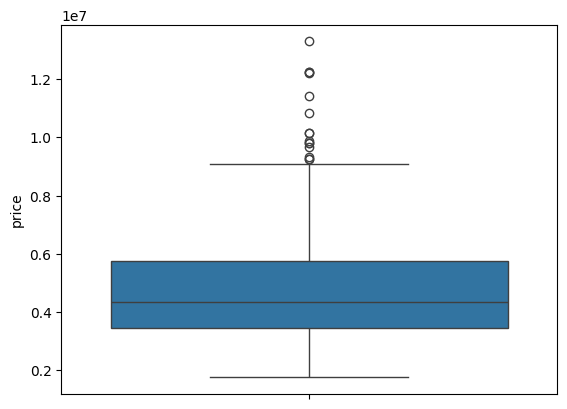

In [14]:
sns.boxplot(data['price'])  # see if price has extreme outliers


***Train Model***

In [15]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [18]:
# Select features and target
X = data.drop([ 'price'], axis=1)
y = data['price']

In [19]:
# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['mainroad', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus' , 'guestroom' , 'hotwaterheating']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [21]:
# Create model instance
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [22]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [23]:
pred = model.predict(X_test)

In [24]:
pred

array([3147907.        , 5202540.        , 2708230.        ,
       3621100.        , 5785220.        , 4660670.        ,
       4003580.        , 2652090.        , 3491810.        ,
       3929520.        , 3480260.        , 3192210.        ,
       3874150.        , 4806760.        , 5679030.        ,
       5901840.        , 6706280.        , 5138910.        ,
       3219300.        , 4298630.        , 4481400.        ,
       4619370.        , 4432050.        , 6396180.        ,
       2485980.        , 3154746.        , 3105760.        ,
       4466000.        , 4583600.        , 3623687.66666667,
       4414165.        , 3565299.5       , 3537453.5       ,
       5074230.        , 3749763.5       , 7348699.4       ,
       2797550.        , 6588248.8       , 5653480.        ,
       3351390.        , 6262620.        , 3003840.        ,
       3353504.        , 4458090.        , 3151645.        ,
       4166260.        , 2525880.        , 3303510.        ,
       4267900.        ,

In [25]:
model.score(X,y)

0.8333671944792411

In [26]:
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as model.pkl")

✅ Model trained and saved as model.pkl


In [27]:
print(X_train.columns.tolist())

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'basement_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'guestroom_yes', 'hotwaterheating_yes']


In [28]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
# Define column names in the same order as training
columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
           'mainroad_yes', 'basement_yes', 'airconditioning_yes', 'prefarea_yes',
           'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
           'guestroom_yes', 'hotwaterheating_yes']

# Sample input
values = [[7420, 4, 2, 3, 2,   # area, bedrooms, bathrooms, stories, parking
          1, 0, 0, 0,         # mainroad_yes, basement_yes, airconditioning_yes, prefarea_yes
          0, 0, 1, 0]]        # furnishingstatus semi/unfurnished, guestroom_yes, hotwaterheating_yes


# Create DataFrame
df_input = pd.DataFrame(values, columns=columns)

# Predict
prediction = model.predict(df_input)
print(f"Predicted price: ${prediction[0]:,.2f}")

Predicted price: $7,653,450.00
